In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!git clone https://github.com/taehojo/data.git
df = pd.read_csv('./data/wine.csv', header=None)
df


'data'에 복제합니다...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 9), reused 26 (delta 4), pack-reused 0 (from 0)
오브젝트를 받는 중: 100% (36/36), 483.12 KiB | 26.00 KiB/s, 완료.
델타를 알아내는 중: 100% (9/9), 완료.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0)

score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {score[1]}')


2025-04-09 14:02:52.523548: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
41/41 [==============================] - 0s 608us/step - loss: 0.1450 - accuracy: 0.9523
Test accuracy: 0.9523077011108398


In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath = './data/model/{epoch:02d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=0)

history = model.fit(X_train, y_train, epochs=50, batch_size=500,
                    validation_split=0.25, verbose=0, callbacks=[checkpointer])


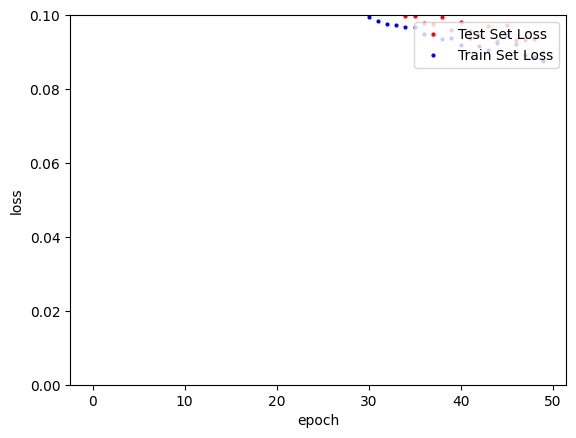

In [4]:
hist_df = pd.DataFrame(history.history)
hist_df

v_loss = hist_df['val_loss']
t_loss = hist_df['loss']
x_len = np.arange(len(t_loss))

plt.plot(x_len, v_loss, 'o', c='red', markersize=2, label='Test Set Loss')
plt.plot(x_len, t_loss, 'o', c='blue', markersize=2, label='Train Set Loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0.0, 0.10)
plt.show()


In [5]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

modelpath = './data/model/Ch14-4-bestmodel.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                    validation_split=0.25, verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 1/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0886 - accuracy: 0.9731 - val_loss: 0.0942 - val_accuracy: 0.9715
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0896 - accuracy: 0.9725 - val_loss: 0.0917 - val_accuracy: 0.9723
Epoch 3/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0907 - accuracy: 0.9700 - val_loss: 0.0894 - val_accuracy: 0.9700
Epoch 4/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0908 - accuracy: 0.9720 - val_loss: 0.0979 - val_accuracy: 0.9592
Epoch 5/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0865 - accuracy: 0.9746 - val_loss: 0.0883 - val_accuracy: 0.9677
Epoch 6/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0847 - accuracy: 0.9746 - val_loss: 0.0894 - val_accuracy: 0.9715
Epoch 7/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0858 - accuracy: 0.9749 - val_loss: 0.0867 - val_accuracy: 0.9708
Epoch 8/2000
8/8 [=

In [6]:
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {score[1]}')


41/41 [==============================] - 0s 575us/step - loss: 0.0570 - accuracy: 0.9838
Test accuracy: 0.983846127986908
